In [12]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# IMPORT DATA

In [19]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [21]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [39]:
data.loc[data['Channel'] == 1, 'Channel'] = 'Horeca'
data.loc[data['Channel'] == 2, 'Channel'] = 'Retail'

In [41]:
data.loc[data['Region'] == 1, 'Region'] = 'Lisnon'
data.loc[data['Region'] == 2, 'Region'] = 'Retail'
data.loc[data['Region'] == 3, 'Region'] = 'Other'

In [42]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Horeca,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


# NUMERICAL-CATEGORICAL SPLIT

In [43]:
label = ['Channel','Region']
data_cat = data[label]
data_num = data.drop(['Channel','Region'], axis=1)

In [44]:
data_cat.head()

,Channel,Region
0,Retail,Other
1,Retail,Other
2,Retail,Other
3,Horeca,Other
4,Retail,Other


In [45]:
data_num.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


# NUMERICAL IMPUTATION

In [46]:
data_num.isnull().any()

Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicassen          False
dtype: bool

# CATEGORICAL IMPUTATION

In [47]:
data_cat.isnull().any()

Channel    False
Region     False
dtype: bool

# CATEGORICAL DUMMY

In [48]:
#CATEGORICAL DUMMY
d_cat=pd.get_dummies(data_cat[label])

In [49]:
d_cat.head()

,Channel_Horeca,Channel_Retail,Region_Lisnon,Region_Other,Region_Retail
0,0,1,0,1,0
1,0,1,0,1,0
2,0,1,0,1,0
3,1,0,0,1,0
4,0,1,0,1,0


# COMBINE NUMERICAL & CATEGORICAL DATA

In [50]:
data_new = pd.concat([data_num, d_cat], axis = 1)
data_new.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_Horeca,Channel_Retail,Region_Lisnon,Region_Other,Region_Retail
0,12669,9656,7561,214,2674,1338,0,1,0,1,0
1,7057,9810,9568,1762,3293,1776,0,1,0,1,0
2,6353,8808,7684,2405,3516,7844,0,1,0,1,0
3,13265,1196,4221,6404,507,1788,1,0,0,1,0
4,22615,5410,7198,3915,1777,5185,0,1,0,1,0


# STANDARDIZE/NORMALIZE

In [51]:
mms = MinMaxScaler()
mms.fit(data_new)
data_transformed = mms.transform(data_new)

# K-MEANS ALGORITHM

In [52]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(data_transformed)
    wcss.append(km.inertia_)

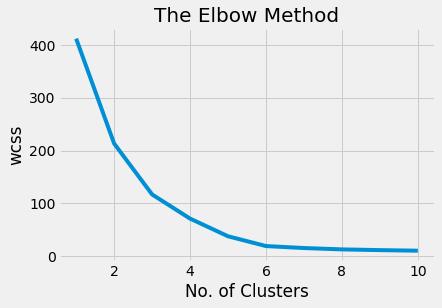

In [53]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

# K-means with the best number of cluster

In [54]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(data_transformed)

In [61]:
data['Cluster']=y_means
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,Retail,Other,12669,9656,7561,214,2674,1338,1
1,Retail,Other,7057,9810,9568,1762,3293,1776,1
2,Retail,Other,6353,8808,7684,2405,3516,7844,1
3,Horeca,Other,13265,1196,4221,6404,507,1788,0
4,Retail,Other,22615,5410,7198,3915,1777,5185,1


In [62]:
data.groupby(['Cluster']).agg(['count'])

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,count,count,count,count,count,count,count,count
Cluster,,,,,,,,
0,211,211,211,211,211,211,211,211
1,142,142,142,142,142,142,142,142
2,87,87,87,87,87,87,87,87


## Cluster 1

In [63]:
clust1 = data['Cluster']==0
df_clust1 = data[clust1]
df_clust1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
3,Horeca,Other,13265,1196,4221,6404,507,1788,0
8,Horeca,Other,5963,3648,6192,425,1716,750,0
15,Horeca,Other,10253,1114,3821,397,964,412,0
17,Horeca,Other,5876,6157,2933,839,370,4478,0
19,Horeca,Other,7780,2495,9464,669,2518,501,0


## Cluster 2

In [64]:
clust2 = data['Cluster']==1
df_clust2 = data[clust2]
df_clust2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,Retail,Other,12669,9656,7561,214,2674,1338,1
1,Retail,Other,7057,9810,9568,1762,3293,1776,1
2,Retail,Other,6353,8808,7684,2405,3516,7844,1
4,Retail,Other,22615,5410,7198,3915,1777,5185,1
5,Retail,Other,9413,8259,5126,666,1795,1451,1


## Cluster 3

In [65]:
clust3 = data['Cluster']==2
df_clust3 = data[clust3]
df_clust3.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
196,Horeca,Lisnon,30624,7209,4897,18711,763,2876,2
198,Horeca,Lisnon,11686,2154,6824,3527,592,697,2
199,Horeca,Lisnon,9670,2280,2112,520,402,347,2
202,Horeca,Lisnon,25203,11487,9490,5065,284,6854,2
203,Horeca,Lisnon,583,685,2216,469,954,18,2


In [68]:
km.cluster_centers_[:,0]

array([0.12372091, 0.07937122, 0.11142778])